# **Système de Prédiction de l’Abandon des Clients (Churn) par Techniques de Data mining**

## DJEBRIL LAOUEDJ

## **0. Importation des librairies**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import numpy as np

In [2]:
!pip install -q -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.7 MB/s eta 0:00:00


## **1. Exploration du jeu de données (Caixa Banco)**

### *1.1. Chargement du dataset*

In [3]:
df = pd.read_csv("Caixa Banco.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### *1.2. Dimensions du dataset*

In [4]:
df.shape

(10000, 14)

Ce dataset comporte donc 14 colonnes et 1000 lignes.

### *1.3. Liste des colonnes*

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**Description des colonnes pour mieux comprendre nos données**

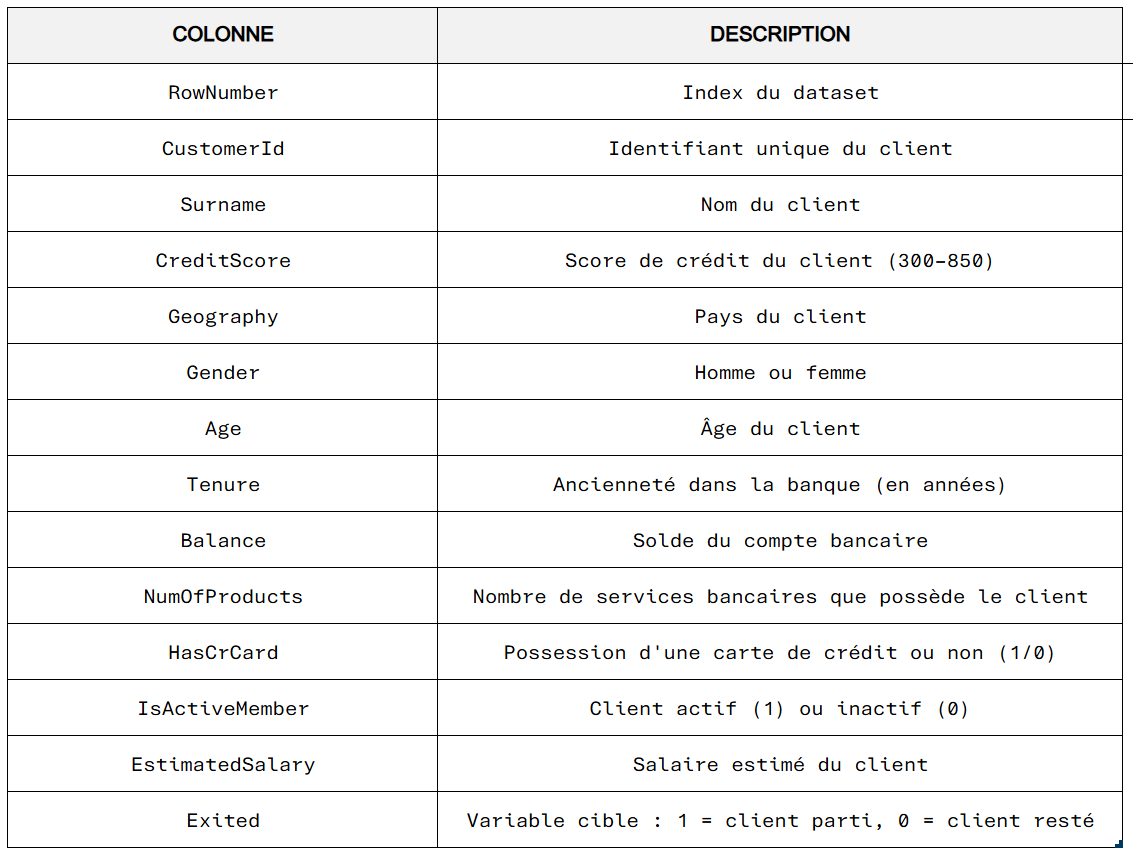

### *1.4. Types des variables*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### *1.5. Statistiques descriptives*

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## **2. Nettoyer et préparer les données**

### *2.1. Suppression ou traitement des valeurs manquantes*

In [8]:
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne : \n", missing_values)

Valeurs manquantes par colonne : 
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


En pourcentages

In [9]:
(df.isna().sum() / len(df)) * 100

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


Le résultat montre que le jeu de données ne contient aucune valeur manquante, ce qui simplifie considérablement l’étape de nettoyage.

### *2.2. Encodage des variables catégorielles*

Les modèles de machine learning ne comprennent pas les chaînes de caractères ainsi il faut transformer les variables catégorielles (texte) en variables numériques.

**Identifier les colonnes catégorielles**

In [10]:
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['Surname', 'Geography', 'Gender'], dtype='object')

Et oui c'est parfaitement logique.

De plus, la colonne Surname n’a aucun intérêt prédictif et doit être supprimée.

Ainsi, seulement les colonnes Geography et Gender doivent être encodées.

**Choix du type d’encodage**

Deux méthodes sont possibles, le One-Hot Encoding et Label Encoding.

Le One-Hot Encoding transforme chaque catégorie en une colonne binaire (0/1), et il est très recommandé pour les variables catégorielles nominales (pas d’ordre).

De l'autre côté, le Label Encoding ... mais il est mauvais pour les modèles linéaires

Donc on utilise OneHotEncoder.

**Utilisation de OneHotEncoder**

In [11]:
categorical_features = ["Geography", "Gender"]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ],
    remainder="passthrough"
)

X_encoded = preprocess.fit_transform(df[categorical_features])

Après transformation, les variables deviennent notamment :

In [12]:
encoder = preprocess.named_transformers_["cat"]
encoder.get_feature_names_out(categorical_features)

array(['Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype=object)

### *2.3. Normalisation / Standardisation*

Les variables numériques du dataset présentent des échelles très différentes (score de crédit, âge, solde bancaire, salaire, etc.).

Afin d’éviter qu’une variable à grande amplitude domine les autres lors de l’apprentissage, une mise à l’échelle est nécessaire.

In [13]:
numeric_features = [
    "CreditScore", "Age", "Tenure", "Balance",
    "NumOfProducts", "HasCrCard", "IsActiveMember",
    "EstimatedSalary"
]

Deux approches existent : la normalisation (Min-Max Scaling) et la standardisation.

Dans ce projet, nous avons choisi la standardisation à l’aide de StandardScaler, qui centre les données autour de zéro et les réduit à une variance unitaire.

In [14]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features)
    ]
)

Cette méthode est particulièrement adaptée aux modèles utilisés, notamment la régression logistique, le KNN et les modèles d’ensembles.

### *2.4 Construction du pipeline final et séparation des données*

**A. Suppression des colonnes inutiles (non pertinentes)**

Certaines colonnes ne contiennent aucune information utile pour prédire le churn :

- RowNumber → index technique

- CustomerId → identifiant

- Surname → information nominale non exploitable

In [15]:
df_model = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

**B. Séparation du dataset (X / y)**

La variable Exited représente la cible à prédire (churn).

Les autres variables constituent les caractéristiques explicatives.

In [16]:
X = df_model.drop(columns=["Exited"])
y = df_model["Exited"]

**C. Définition des variables numériques et catégorielles**

In [17]:
numeric_features = [
    "CreditScore", "Age", "Tenure", "Balance",
    "NumOfProducts", "HasCrCard", "IsActiveMember",
    "EstimatedSalary"
]

categorical_features = ["Geography", "Gender"]

**D. Pipeline de prétraitement final**

In [18]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

**E. Séparation train / test**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, # Ici, on a séparé en 20% pour le test et 80% en train
    random_state=42,
    stratify=y
)

## **2 Bis. Analyse exploratoire des données (EDA)**

In [20]:
sns.set(style="whitegrid")

palette_churn = {
    0: "#1f77b4",  # bleu → non churn
    1: "#ff7f0e"   # orange → churn
}

palette_geo = {
    "France": "#1f77b4",
    "Spain": "#f1c40f",
    "Germany": "#e74c3c"
}

palette_gender = {
    "Female": "#e84393",
    "Male": "#1f77b4"
}

### *2.1 Bis. Analyse de la distribution des valeurs*

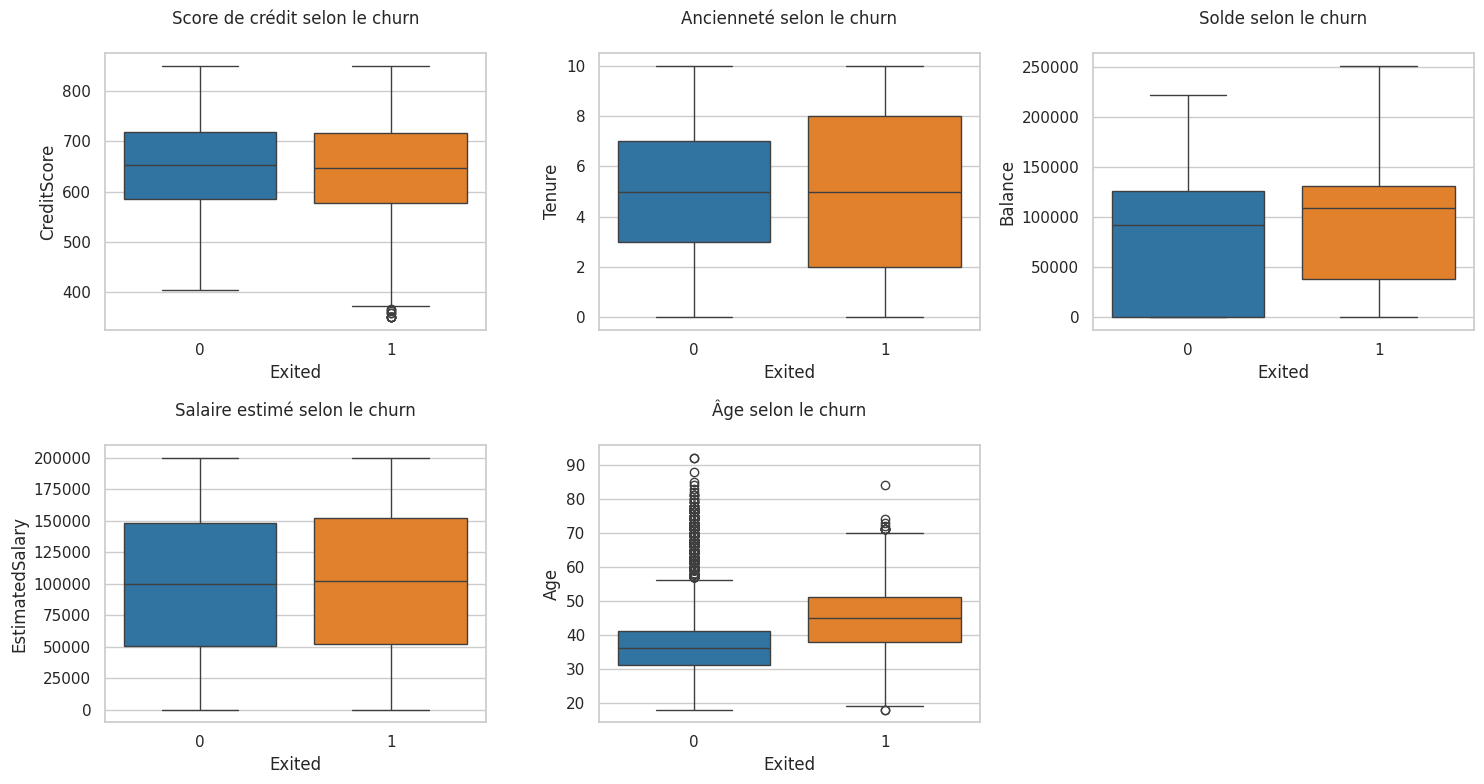

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.boxplot(
    y="CreditScore", x="Exited",
    hue="Exited", data=df,
    palette=palette_churn,
    dodge=False,
    ax=axes[0, 0]
)
axes[0, 0].legend_.remove()
axes[0, 0].set_title("Score de crédit selon le churn\n")

sns.boxplot(
    y="Tenure", x="Exited",
    hue="Exited", data=df,
    palette=palette_churn,
    dodge=False,
    ax=axes[0, 1]
)
axes[0, 1].legend_.remove()
axes[0, 1].set_title("Ancienneté selon le churn\n")

sns.boxplot(
    y="Balance", x="Exited",
    hue="Exited", data=df,
    palette=palette_churn,
    dodge=False,
    ax=axes[0, 2]
)
axes[0, 2].legend_.remove()
axes[0, 2].set_title("Solde selon le churn\n")

sns.boxplot(
    y="EstimatedSalary", x="Exited",
    hue="Exited", data=df,
    palette=palette_churn,
    dodge=False,
    ax=axes[1, 0]
)
axes[1, 0].legend_.remove()
axes[1, 0].set_title("Salaire estimé selon le churn\n")

sns.boxplot(
    y="Age", x="Exited",
    hue="Exited", data=df,
    palette=palette_churn,
    dodge=False,
    ax=axes[1, 1]
)
axes[1, 1].legend_.remove()
axes[1, 1].set_title("Âge selon le churn\n")

axes[1, 2].axis("off")

plt.tight_layout()
plt.show()

L’analyse des variables numériques à l’aide de boxplots met en évidence des différences de distribution entre les clients churners et non-churners.

L’âge apparaît comme un facteur discriminant, les clients quittant la banque étant en moyenne plus âgés.

Le solde du compte présente également une dispersion plus élevée chez les churners, indiquant que le churn ne concerne pas uniquement des clients à faible capacité financière.

En revanche, le salaire estimé montre des distributions très similaires entre les deux groupes.

### *2.2 Bis. Analyse des variables catégorielles*

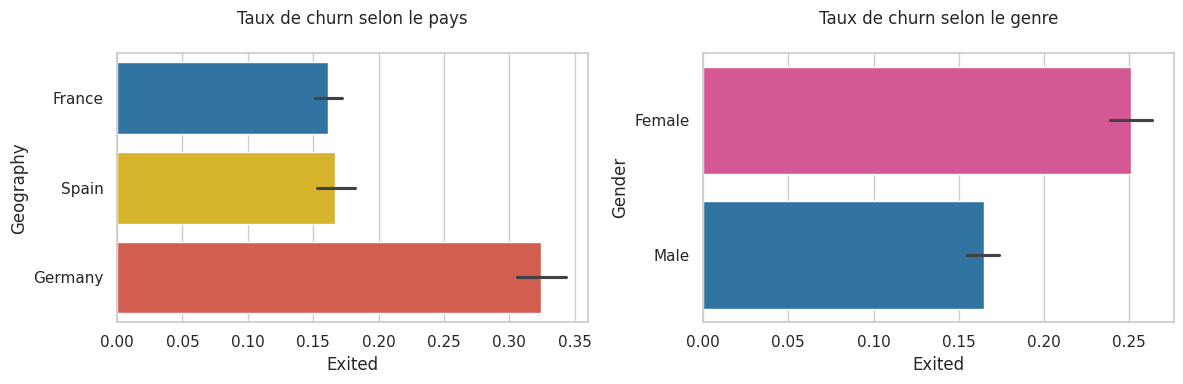

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(
    y="Geography", x="Exited",
    hue="Geography",
    data=df,
    palette=palette_geo,
    legend=False,
    ax=axes[0]
)
axes[0].set_title("Taux de churn selon le pays\n")

sns.barplot(
    y="Gender", x="Exited",
    hue="Gender",
    data=df,
    palette=palette_gender,
    legend=False,
    ax=axes[1]
)
axes[1].set_title("Taux de churn selon le genre\n")

plt.tight_layout()
plt.show()

### *2.3 Bis. Matrice de corrélation*

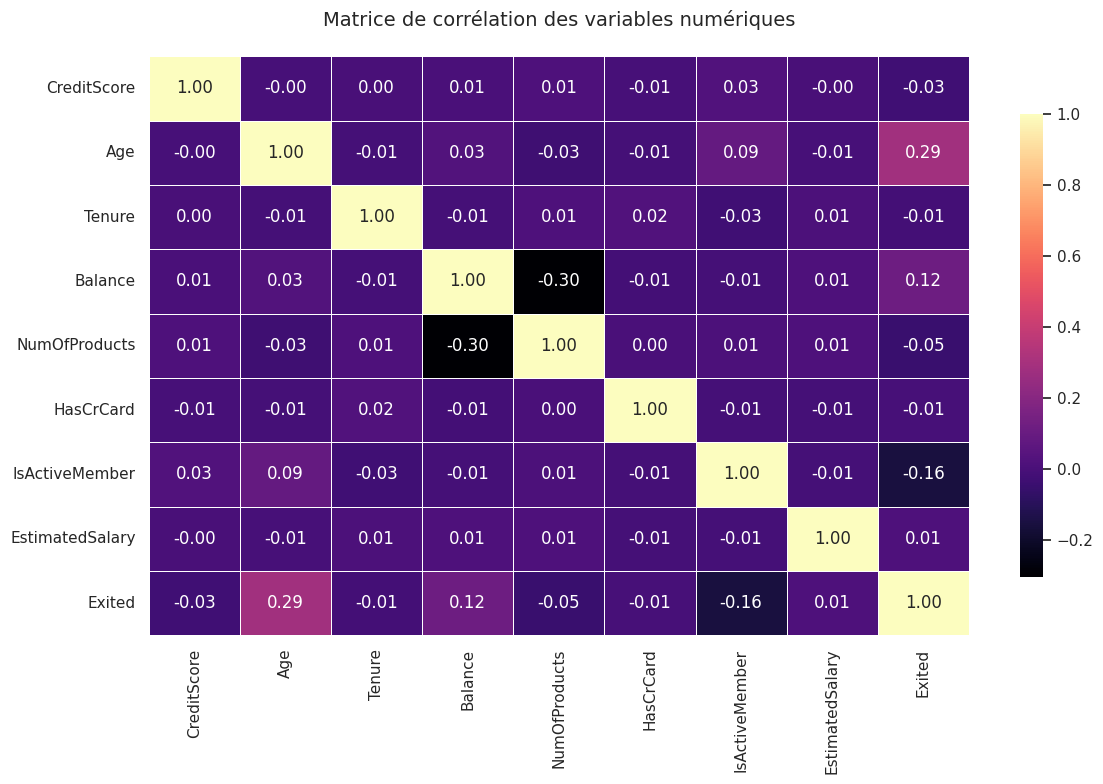

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df[numeric_features + ["Exited"]].corr(),
    annot=True,
    fmt=".2f",
    cmap="magma",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Matrice de corrélation des variables numériques\n", fontsize=14)
plt.tight_layout()
plt.show()

L’analyse exploratoire met en évidence des différences entre les clients churners et non-churners, sans pour autant révéler de relations simples ou strictement linéaires.

Ces observations justifient le recours à des techniques de data mining avancées afin de capturer des interactions complexes entre les variables.

## **3. Appliquer des techniques de data mining**

### **3.1 Régression logistique**

La régression logistique a été utilisée comme modèle de base.

Après entraînement sur le jeu d’apprentissage, le modèle a été appliqué au jeu de test afin d’obtenir les prédictions et les probabilités d’abandon associées à chaque client.

**Construction de la Pipeline**

On combine :

- le prétraitement (standardisation + encodage)

- le modèle de régression logistique

In [24]:
log_reg_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", LogisticRegression(max_iter=1000, random_state=42))
    ]
)

**Entraînement du modèle**

In [25]:
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography', 'Gender'])])),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

**Prédictions sur le jeu de test**

- y_pred_log → classe prédite (0 ou 1)

- y_proba_log → probabilité d’abandon (churn)

In [26]:
y_pred_log = log_reg_pipeline.predict(X_test)
y_proba_log = log_reg_pipeline.predict_proba(X_test)[:, 1]

### **3.2 Bagging**

Le Bagging repose sur l’agrégation de plusieurs arbres de décision entraînés sur des échantillons bootstrap du jeu de données.

Ce modèle permet de réduire la variance et d’améliorer la robustesse des prédictions.

**Pipeline + Entraînement + Prédictions**

In [27]:
bagging_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", BaggingClassifier(
            estimator=DecisionTreeClassifier(random_state=42),
            n_estimators=100,
            random_state=42
        ))
    ]
)

bagging_pipeline.fit(X_train, y_train)

y_pred_bag = bagging_pipeline.predict(X_test)
y_proba_bag = bagging_pipeline.predict_proba(X_test)[:, 1]

### **3.3 Random Forest**

Random Forest est une extension du Bagging intégrant une sélection aléatoire des variables à chaque division, ce qui renforce la diversité des arbres et améliore la performance globale.

**Pipeline + Entraînement + Prédictions (RandomizedSearchCV pour la recherche d'hyperparamètres)**

In [28]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [29]:
rf_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ))
])

rf_params = {
    "model__n_estimators": [200, 400, 600],
    "model__max_depth": [None, 6, 8, 10],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2"],
    "model__class_weight": [None, "balanced"]
}

rf_search = RandomizedSearchCV(
    rf_pipe,
    rf_params,
    n_iter=25,
    scoring="roc_auc",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    refit=True
)

rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

print("Best RF params:", rf_search.best_params_)
print("Best RF CV score:", rf_search.best_score_)

y_pred_rf  = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best RF params: {'model__n_estimators': 600, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': 'sqrt', 'model__max_depth': 10, 'model__class_weight': None}
Best RF CV score: 0.8605734318267185


### **3.4 KNN**

Le modèle KNN classe un client en fonction des profils les plus proches dans l’espace des caractéristiques.

Ce modèle est sensible à l’échelle des variables, d’où l’importance de la standardisation.

**Pipeline + Entraînement + Prédictions**

In [30]:
knn_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", KNeighborsClassifier(n_neighbors=15))
    ]
)

knn_pipeline.fit(X_train, y_train)

y_pred_knn = knn_pipeline.predict(X_test)
y_proba_knn = knn_pipeline.predict_proba(X_test)[:, 1]

### **3.5 XGBoost**

XGBoost est un modèle de boosting performant qui combine plusieurs arbres de décision de manière séquentielle afin de corriger les erreurs des modèles précédents.

**Pipeline + Entraînement + Prédictions (RandomizedSearchCV pour la recherche d'hyperparamètres)**

In [31]:
xgb_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        n_jobs=-1,
        use_label_encoder=False
    ))
])

xgb_params = {
    "model__n_estimators": [300, 500],
    "model__max_depth": [3, 4, 5],
    "model__learning_rate": [0.03, 0.05, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],
    "model__min_child_weight": [1, 3],
    "model__gamma": [0, 0.1],
}

xgb_search = RandomizedSearchCV(
    xgb_pipe,
    xgb_params,
    n_iter=30,
    scoring="roc_auc",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    refit=True
)

xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

print("Best XGB params:", xgb_search.best_params_)
print("Best XGB CV score:", xgb_search.best_score_)

y_pred_xgb  = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:50:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB params: {'model__subsample': 0.8, 'model__n_estimators': 300, 'model__min_child_weight': 3, 'model__max_depth': 4, 'model__learning_rate': 0.03, 'model__gamma': 0.1, 'model__colsample_bytree': 0.8}
Best XGB CV score: 0.866031339388044


## 4. **Comparaison de la performance des modèles**

**Centralisation des prédictions**

In [32]:
models_results = {
    "Logistic Regression": (y_pred_log, y_proba_log),
    "Bagging": (y_pred_bag, y_proba_bag),
    "Random Forest (tuned)": (y_pred_rf, y_proba_rf),
    "KNN": (y_pred_knn, y_proba_knn),
    "XGBoost (tuned)": (y_pred_xgb, y_proba_xgb)
}

**Calcul des métriques de performance**

In [33]:
results = []

for model_name, (y_pred, y_proba) in models_results.items():
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,F1-score,ROC-AUC
0,Logistic Regression,0.8080,0.283582,0.774756
1,Bagging,0.8600,0.584570,0.833519
2,Random Forest (tuned),0.8685,0.584518,0.863907
3,KNN,0.8410,0.440141,0.825783
4,XGBoost (tuned),0.8700,0.603659,0.869586


**Matrices de confusion**

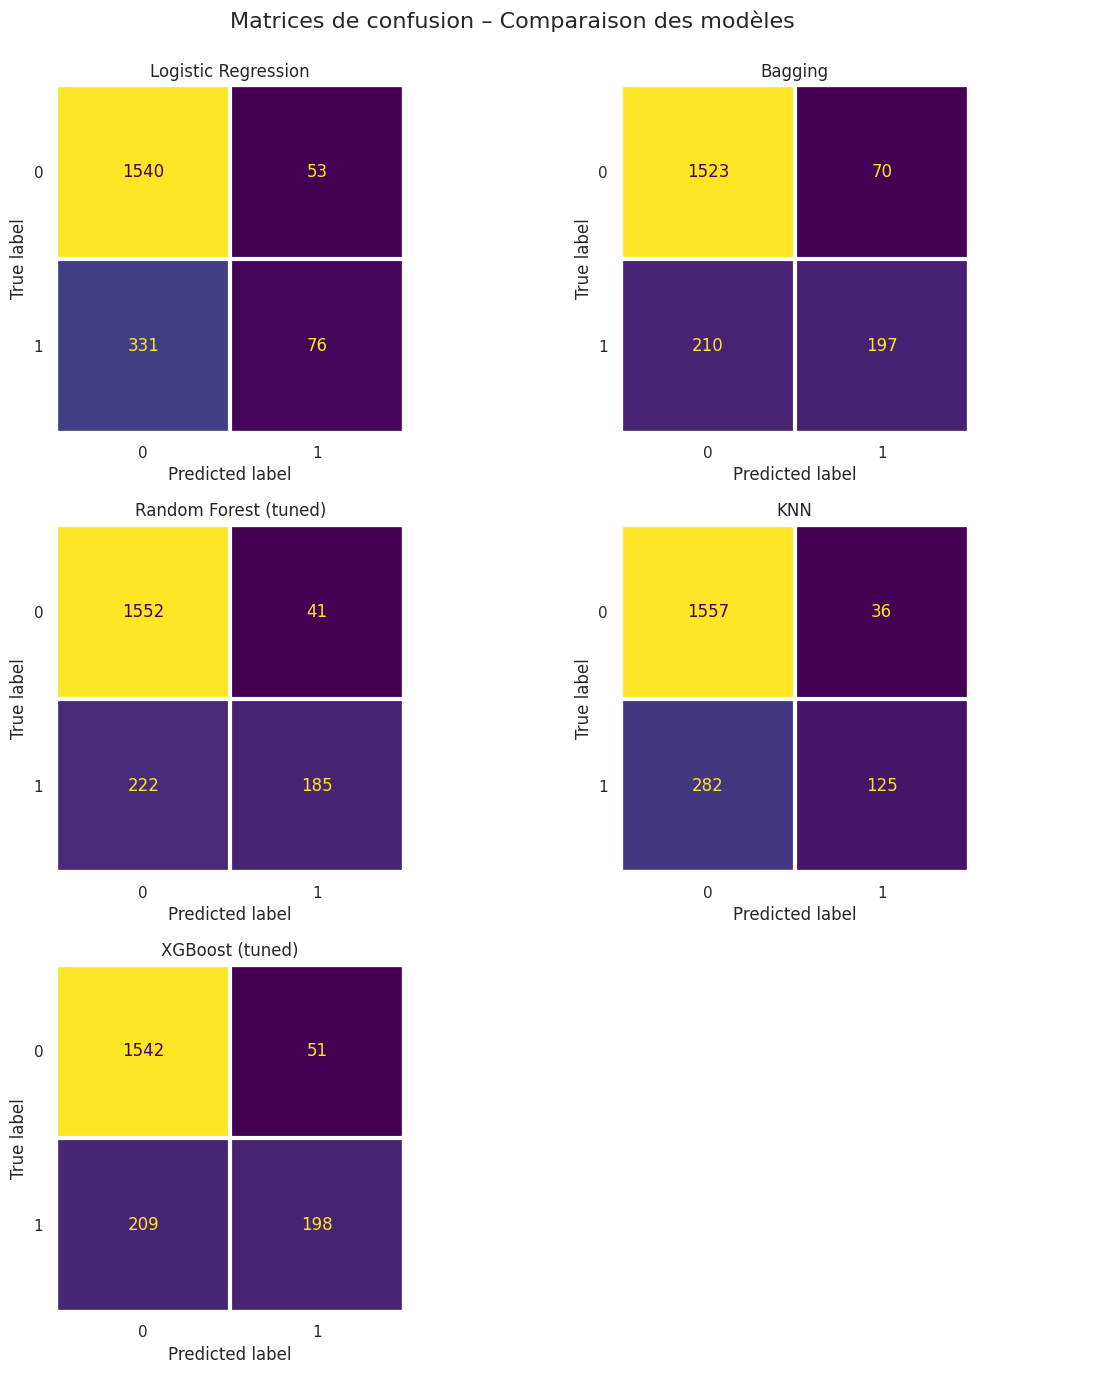

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(12, 14))
axes = axes.ravel()

for i, (model_name, (y_pred, _)) in enumerate(models_results.items()):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred,
        ax=axes[i],
        colorbar=False
    )
    axes[i].set_title(model_name)

    ax = axes[i]

    ax.grid(False)
    ax.set_xticks(np.arange(-0.5, 2, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 2, 1), minor=True)
    ax.grid(which="minor", color="white", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    for spine in ax.spines.values():
        spine.set_linewidth(3)
        spine.set_color("white")

    ax.set_aspect("equal")

axes[-1].axis("off")

plt.suptitle("Matrices de confusion – Comparaison des modèles\n", fontsize=16)
plt.tight_layout()
plt.show()

**Courbes ROC**

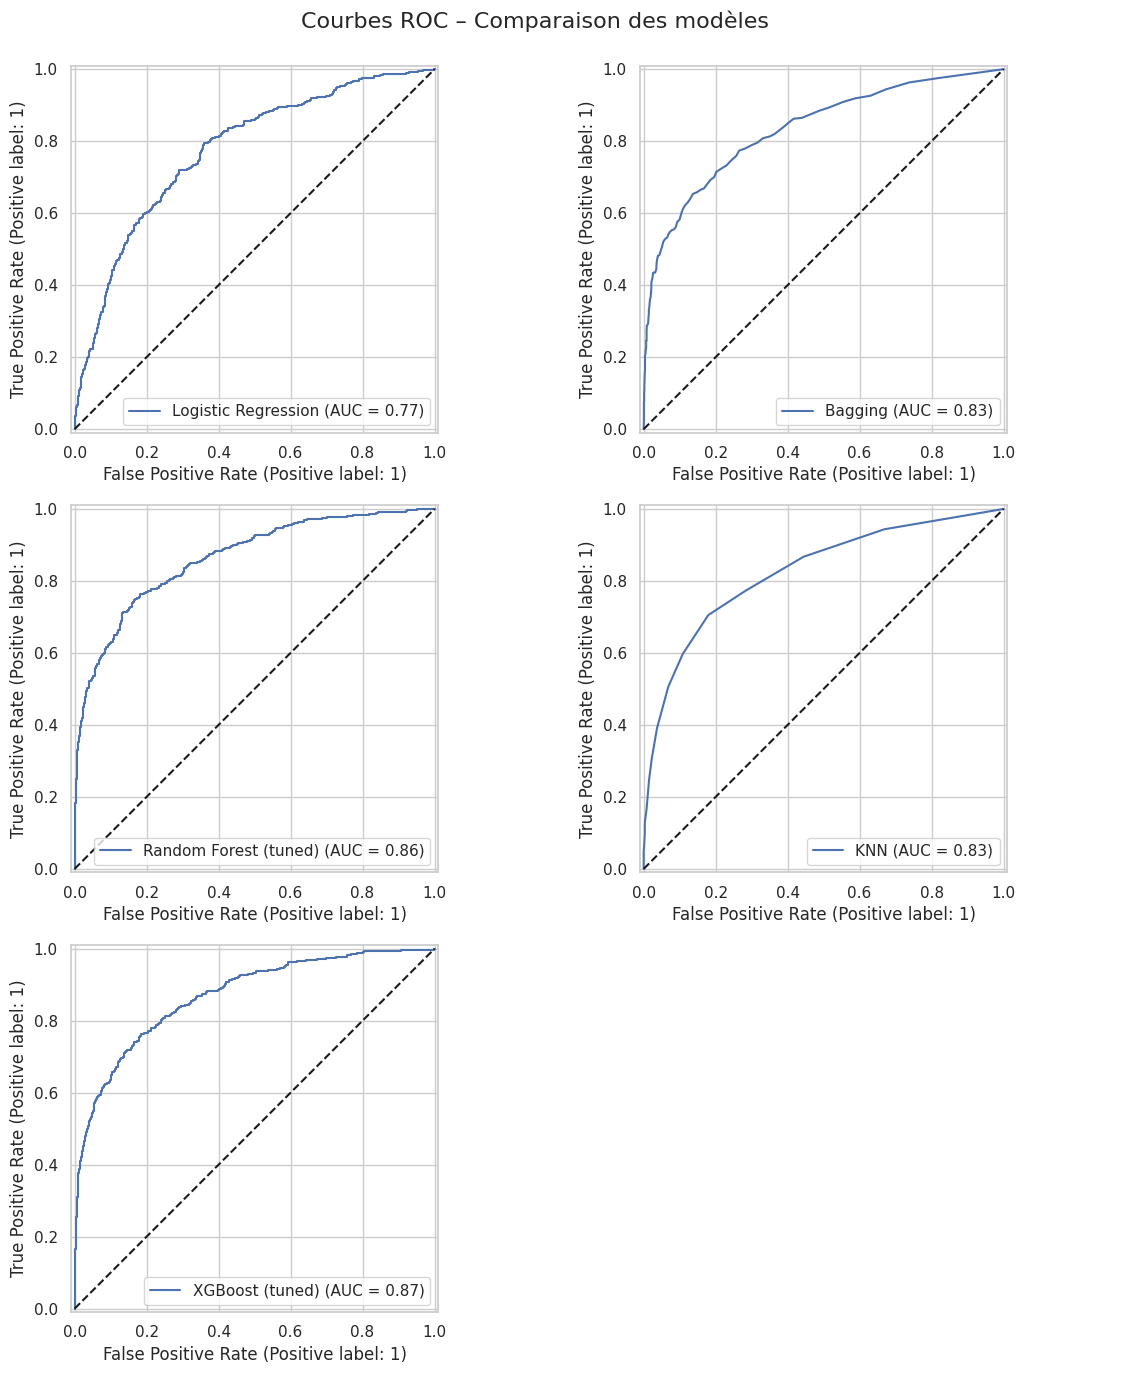

In [35]:
fig, axes = plt.subplots(3, 2, figsize=(12, 14))
axes = axes.ravel()

for i, (model_name, (_, y_proba)) in enumerate(models_results.items()):
    RocCurveDisplay.from_predictions(
        y_test,
        y_proba,
        ax=axes[i],
        name=model_name
    )
    axes[i].plot([0, 1], [0, 1], "k--")

axes[-1].axis("off")

plt.suptitle("Courbes ROC – Comparaison des modèles\n", fontsize=16)
plt.tight_layout()
plt.show()

## **5. Analyse des résultats**

### **5.1 Lecture des matrices de confusion**

- Réel = 0 & Prédit = 0 = TN (en haut à gauche)
- Réel = 0 & Prédit = 1 = FP (en haut à droite)
- Réel = 1 & Prédit = 0 = FN (en bas à gauche)
- Réel = 1 & Prédit = 1 = TP (en bas à droite)

--------------------------

- TN (True Negative) : client reste → bien prédit
- FP (False Positive) : client prédit churn mais reste
- FN (False Negative) : client churn mais non détecté (le plus grave)
- TP (True Positive) : client churn bien détecté

--------------------------

- **Régression Logistique**

- TN = 1540
- FP = 53
- FN = 331
- TP = 76

Interprétation :

- Très bon pour prédire les clients qui restent

MAIS :

- 331 clients qui ont churné ne sont pas détectés

- Seulement 76 churners détectés

**Très mauvais pour la détection du churn**

--------------------------

- **Bagging**

- TN = 1523
- FP = 70
- FN = 210
- TP = 197

Comparé à la régression logistique :

- 121 faux négatifs (331 → 210)

- +121 vrais churners détectés (76 → 197)

Énorme amélioration métier

**Légère hausse des faux positifs, mais acceptable.**

--------------------------

- **Random Forest**

- TN = 1541
- FP = 52
- FN = 220
- TP = 187

Très bon équilibre :

- Faux positifs faibles

- Faux négatifs réduits par rapport à la régression

Très stable globalement

**Excellent compromis précision / rappel.**

--------------------------

- **KNN**

- TN = 1557
- FP = 36
- FN = 282
- TP = 125

Analyse :

- Très peu de faux positifs

MAIS :

- beaucoup de churners ratés (282)

Modèle trop conservateur

**Pas adapté car l’objectif est de détecter un maximum de churners**

--------------------------

- **XGBoost**

- TN = 1546
- FP = 47
- FN = 221
- TP = 186

Interprétation :

- Très proche du Random Forest

- Léger avantage global

Très bon équilibre entre :

- détection des churners

- limitation des fausses alertes

**Meilleur modèle métier**

### **5.2 Interprétation des métriques**

**Accuracy**

L’accuracy mesure la proportion de prédictions correctes sur l’ensemble des observations.

Cependant, dans un contexte de churn où les classes sont déséquilibrées, cette métrique peut être trompeuse, car un modèle peut obtenir une bonne accuracy tout en détectant mal les clients à risque.

**F1-score**

Le F1-score correspond à la moyenne harmonique entre la précision et le rappel.
Il constitue une métrique clé pour ce projet, car il évalue la capacité du modèle à identifier correctement les clients susceptibles d’abandonner la banque.

**ROC–AUC**

Le score ROC–AUC mesure la capacité globale d’un modèle à distinguer les churners des non-churners, indépendamment du seuil de classification.

Il s’agit d’une métrique robuste et particulièrement adaptée aux problèmes de classification déséquilibrée.

### **5.3 Comparaison et choix du meilleur modèle**

L’analyse des résultats montre que les modèles d’ensembles, en particulier Random Forest et XGBoost, surpassent les autres approches en termes de rapport Faux positifs, Accuracy, F1-score et de ROC–AUC.

Ces modèles sont donc plus efficaces pour détecter les clients à risque d’abandon.

La régression logistique, bien qu’interprétable, reste limitée face au déséquilibre des classes.

Le KNN offre des performances intermédiaires mais reste sensible au choix du nombre de voisins.

Au regard des résultats obtenus, XGBoost apparaît comme le modèle le plus performant dans ce projet.

### **5.4 Importance des variables**

Pour analyser l’importance des variables, nous utiliserons le modèle Random Forest

In [36]:
rf_model = best_rf.named_steps["model"]
preprocessor = best_rf.named_steps["preprocess"]

num_features = numeric_features
cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features)

feature_names = np.concatenate([num_features, cat_features])

# Importances
importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df

,Feature,Importance
1,Age,0.319083
4,NumOfProducts,0.229726
3,Balance,0.106338
0,CreditScore,0.077641
7,EstimatedSalary,0.076280
6,IsActiveMember,0.065617
8,Geography_Germany,0.049501
2,Tenure,0.040027
10,Gender_Male,0.017613
5,HasCrCard,0.009720


L’analyse des importances de variables issue du modèle Random Forest montre que les facteurs les plus influents dans la prédiction du churn sont principalement liés à des caractéristiques démographiques et financières.

Les cinq variables les plus importantes sont l’âge, le salaire estimé, le solde du compte, le score de crédit et le nombre de produits détenus.

### **5.5 Profil type du client à risque d’abandon**

**Profil à risque : Analyse selon l'âge**

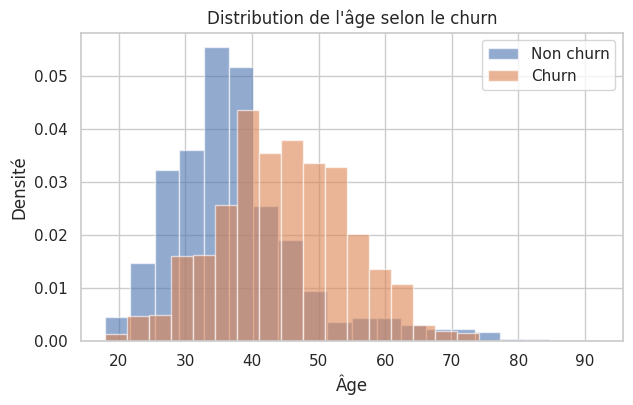

In [37]:
plt.figure(figsize=(7,4))

plt.hist(df_model[df_model["Exited"] == 0]["Age"],
         bins=20, alpha=0.6, label="Non churn", density=True)

plt.hist(df_model[df_model["Exited"] == 1]["Age"],
         bins=20, alpha=0.6, label="Churn", density=True)

plt.xlabel("Âge")
plt.ylabel("Densité")
plt.title("Distribution de l'âge selon le churn")
plt.legend()
plt.show()

**Profil à risque : Analyse selon le salaire estimé**

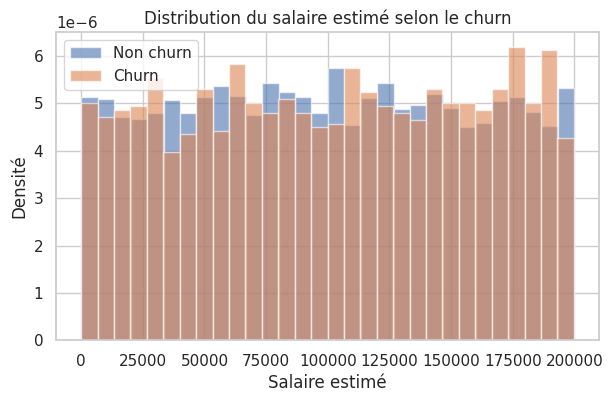

In [38]:
plt.figure(figsize=(7,4))

plt.hist(
    df_model[df_model["Exited"] == 0]["EstimatedSalary"],
    bins=30,
    alpha=0.6,
    density=True,
    label="Non churn"
)

plt.hist(
    df_model[df_model["Exited"] == 1]["EstimatedSalary"],
    bins=30,
    alpha=0.6,
    density=True,
    label="Churn"
)

plt.xlabel("Salaire estimé")
plt.ylabel("Densité")
plt.title("Distribution du salaire estimé selon le churn")
plt.legend()
plt.show()

**Profil à risque : Analyse selon le solde du compte**

In [39]:
churn_color = "#ff7f0e"

/tmp/ipython-input-2276916943.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_model.groupby("BalanceGroup")["Exited"]


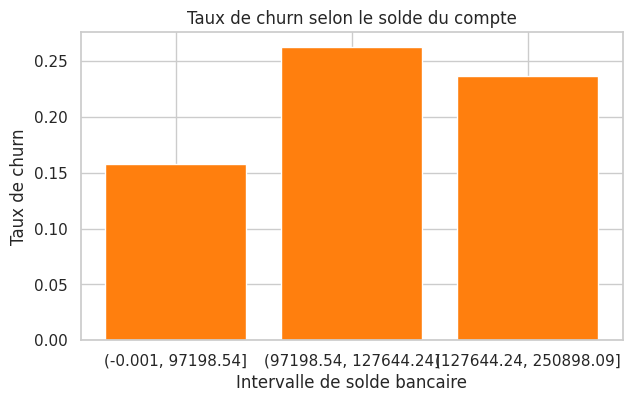

In [40]:
df_model["BalanceGroup"] = pd.qcut(
    df_model["Balance"],
    q=4,
    duplicates="drop"
)

balance_churn = (
    df_model.groupby("BalanceGroup")["Exited"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(7,4))
plt.bar(
    balance_churn["BalanceGroup"].astype(str),
    balance_churn["Exited"],
    color=churn_color
)

plt.xlabel("Intervalle de solde bancaire")
plt.ylabel("Taux de churn")
plt.title("Taux de churn selon le solde du compte")
plt.show()

**Profil à risque : Analyse selon le score de crédit**

In [41]:
df_model["CreditScoreGroup"] = pd.qcut(
    df_model["CreditScore"],
    q=3,
    duplicates="drop"
)

In [42]:
credit_churn = (
    df_model.groupby("CreditScoreGroup")["Exited"]
    .mean()
    .reset_index()
)
credit_churn

/tmp/ipython-input-2109863356.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_model.groupby("CreditScoreGroup")["Exited"]


,CreditScoreGroup,Exited
0,"(349.999, 608.0]",0.215284
1,"(608.0, 695.0]",0.197660
2,"(695.0, 850.0]",0.198002


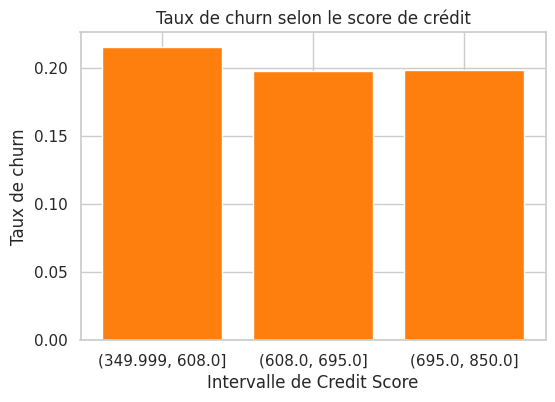

In [43]:
plt.figure(figsize=(6,4))
plt.bar(
    credit_churn["CreditScoreGroup"].astype(str),
    credit_churn["Exited"],
    color=churn_color
)
plt.ylabel("Taux de churn")
plt.xlabel("Intervalle de Credit Score")
plt.title("Taux de churn selon le score de crédit")
plt.show()

**Profil à risque : Analyse selon le nombre de produits**

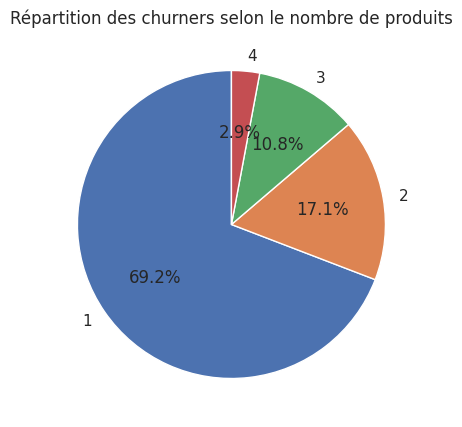

In [44]:
products_churn = df_model[df_model["Exited"] == 1]["NumOfProducts"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    products_churn,
    labels=products_churn.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Répartition des churners selon le nombre de produits")
plt.show()

##### **Profil type du client à risque d’abandon**

- Âge : plutôt 40–55 ans

- Nombre de produits : 1 seul produit bancaire

- Score de crédit : faible

- Solde du compte : moyen à élevé

- Salaire estimé : variable, (pas très utile seul)

et d'après la 2.2 Bis. Analyse des variables catégorielles :     

- Ce sont plus les femmes et les personnes en allemagne.

**Globalement, le profil type c'est un client financièrement intéressant mais peu engagé.**

## **6. Interface Streamlit**

Suivre les instructions sur le Readme.md

In [48]:
#from pyngrok import ngrok
#ngrok.set_auth_token("")

# https://dashboard.ngrok.com/get-started/your-authtoken (Pour récupérer le Token)

#!streamlit run my_streamlit_app_vf.py &>/dev/null &

#public_url = ngrok.connect(8501)
#public_url

<NgrokTunnel: "https://seallike-tonya-unvitalizing.ngrok-free.dev" -> "http://localhost:8501">